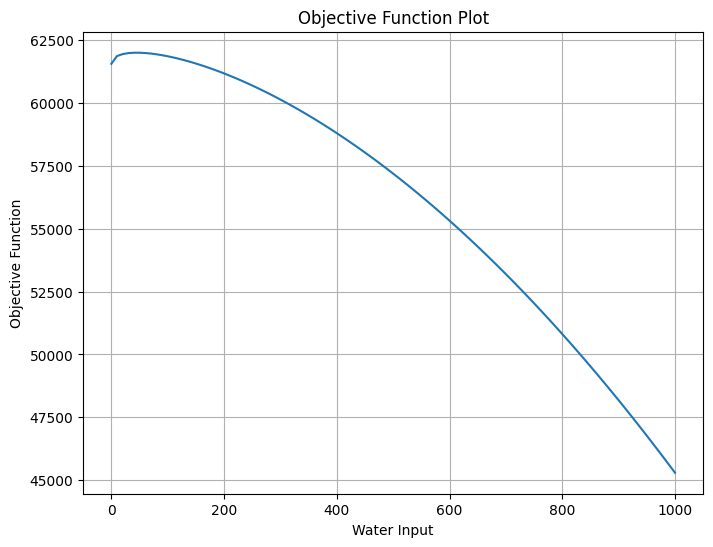

Optimal Water Input: 499.999997495928
Optimal Lambda (Dual Variable for Water Availability Constraint): 25960479.749319416
Optimal Mu (Dual Variable for Non-Negativity Constraint): 25960497.629449785
Optimal Objective Function Value: 57190.21804864335


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the parameters
Price = 420
Water_Available = 1000

# Define the objective function (primal problem)
def objective(Water_Input):
    return Price * (-0.0038 * (100 + 0.1 * np.sqrt(Water_Input))**2 + 3.5542 * (100 + 0.1 * np.sqrt(Water_Input)) - 170.86) - (5 + 0.005 * Water_Input) * Water_Input**1.1

# Define the Lagrangian function
def lagrangian(Water_Input, lam, mu):
    return objective(Water_Input) + lam * (Water_Available - Water_Input) - mu * Water_Input

# Define the KKT conditions
def kkt_conditions(vars):
    Water_Input, lam, mu = vars
    Water_Input = max(Water_Input, 1e-8)  # Prevent division by zero
    # Corrected derivative of the objective function
    dObjective_dWater = Price * (-0.0076 * (100 + 0.1 * np.sqrt(Water_Input)) * 0.05 / np.sqrt(Water_Input) + 3.5542 * 0.05 / np.sqrt(Water_Input)) - (11 * Water_Input**0.1 + 0.005 * 1.1 * Water_Input**0.1)
    stationarity = dObjective_dWater - lam + mu
    primal_feasibility_1 = Water_Available - Water_Input
    primal_feasibility_2 = Water_Input
    dual_feasibility_1 = lam >= 0
    dual_feasibility_2 = mu >= 0
    complementary_slackness_1 = lam * (Water_Available - Water_Input)
    complementary_slackness_2 = mu * Water_Input
    return [stationarity, primal_feasibility_1, primal_feasibility_2, dual_feasibility_1, dual_feasibility_2, complementary_slackness_1, complementary_slackness_2]

# Plot the objective function
Water_Input_vals = np.linspace(0, Water_Available, 100)
objective_vals = [objective(val) for val in Water_Input_vals]
plt.figure(figsize=(8, 6))
plt.plot(Water_Input_vals, objective_vals)
plt.xlabel('Water Input')
plt.ylabel('Objective Function')
plt.title('Objective Function Plot')
plt.grid(True)
plt.show()

# Solve the dual problem using the KKT conditions
def kkt_conditions_fsolve(vars):
    return np.array(kkt_conditions(vars)[:3])

initial_guess = [400, 0, 0]  # Initial guess for Water_Input, lam, mu
max_iterations = 100  # Set the desired number of iterations
solution = fsolve(kkt_conditions_fsolve, initial_guess, maxfev=max_iterations)
optimal_Water_Input, optimal_lam, optimal_mu = solution

# Print the results
print("Optimal Water Input:", optimal_Water_Input)
print("Optimal Lambda (Dual Variable for Water Availability Constraint):", optimal_lam)
print("Optimal Mu (Dual Variable for Non-Negativity Constraint):", optimal_mu)
print("Optimal Objective Function Value:", objective(optimal_Water_Input))